In [1]:
import datetime
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)

Num GPUs Available:  1
TensorFlow version: 2.17.0


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [6]:
model = tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(784, )))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(tf.keras.layers.Dropout(0.25))

In [9]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [10]:
model.add(tf.keras.layers.Dropout(0.25))

In [11]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [16]:
y_test = np.array(y_test, dtype=int)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3222 - sparse_categorical_accuracy: 0.8855


In [17]:
import matplotlib.pyplot as plt

In [21]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2554 - sparse_categorical_accuracy: 0.9041 - val_loss: 0.3303 - val_sparse_categorical_accuracy: 0.8850
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2521 - sparse_categorical_accuracy: 0.9052 - val_loss: 0.3199 - val_sparse_categorical_accuracy: 0.8891
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2514 - sparse_categorical_accuracy: 0.9070 - val_loss: 0.3186 - val_sparse_categorical_accuracy: 0.8889
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2453 - sparse_categorical_accuracy: 0.9072 - val_loss: 0.3352 - val_sparse_categorical_accuracy: 0.8840
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.3361 - val_sparse_categorical_accuracy: 0.8859
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2434 - sparse_categorical_accuracy: 0.9105 - val_loss: 0.3330 - val_sparse_categorical_accuracy:

In [22]:
y_test = np.array(y_test, dtype=int)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3351 - sparse_categorical_accuracy: 0.8901


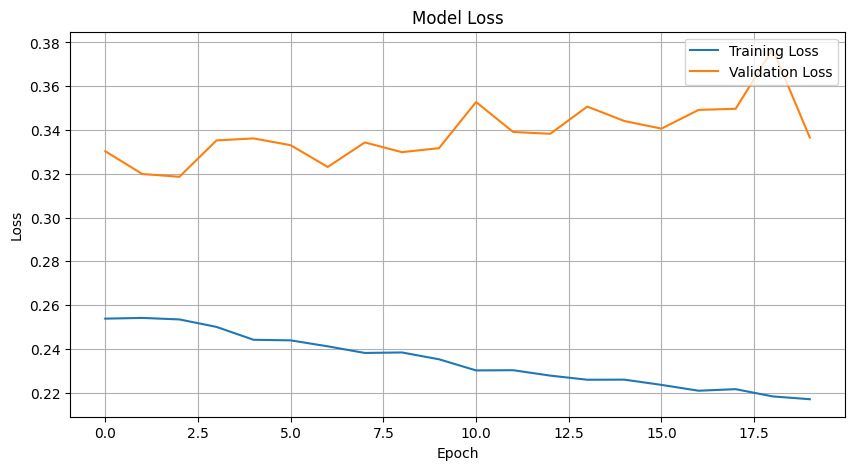

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()